In [ ]:

# installing packages for arabic words correction 
!pip install pyarabic
!pip install pyaspeller
!pip install arabic-reshaper
!pip install python-bidi
!pip install matplotlib wordcloud pandas

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import os


import re # regular expression libary.
import nltk # Natural Language toolkit
nltk.download("stopwords")  #downloading stopwords
nltk.download('punkt')
from nltk import word_tokenize,sent_tokenize
nltk.download('wordnet')
import nltk as nlp



# for reshaping and displaying Arabic text in plots
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm

# Replace 'path_to_arabic_font.ttf' with the actual path to your installed Arabic font
arabic_font_path = '/kaggle/input/font-dataset/FontScripts/Arabic.ttf'
arabic_font = fm.FontProperties(fname=arabic_font_path)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
stories =  glob('../input/hespress/stories*')

In [12]:
data = [pd.read_csv(story,encoding='utf8') for story in stories]

In [13]:
len(stories)

11

In [23]:
df = pd.concat(data)

In [24]:

#Mapping of each month to it's number
months = ['يناير','فبراير','مارس','إبريل','مايو','يونيو','يوليو','أغسطس','سبتمبر','أكتوبر','نوفمبر','ديسمبر']
# months[1]
monthToNum  = {}

for month in range(12):
    monthToNum[months[month]] = month+1
    

monthToNum

{'يناير': 1,
 'فبراير': 2,
 'مارس': 3,
 'إبريل': 4,
 'مايو': 5,
 'يونيو': 6,
 'يوليو': 7,
 'أغسطس': 8,
 'سبتمبر': 9,
 'أكتوبر': 10,
 'نوفمبر': 11,
 'ديسمبر': 12}

In [25]:
import pyarabic.araby as araby
import pyaspeller
import arabic_reshaper
from bidi.algorithm import get_display

#spell_checker = pyaspeller.Aspeller(lang='ar')

# We could use the spell checker in task1 but with Arabic dictionary
def arabic_spell_check(word):
    return spell_checker.spell(word)


#The distance metric used between any two words
def levenshtein_distance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for index2, char2 in enumerate(s2):
        new_distances = [index2 + 1]
        for index1, char1 in enumerate(s1):
            if char1 == char2:
                new_distances.append(distances[index1])
            else:
                new_distances.append(1 + min((distances[index1], distances[index1 + 1], new_distances[-1])))
        distances = new_distances

    return distances[-1]

# Auto correct words based on dictionary by finding the minimum number of insertion,deletion to convert a word to other word in dic
def arabic_auto_correct(word, vocabulary):

    min_distance = float('inf')
    corrected_word = word

    for correct_word in vocabulary:
        distance = levenshtein_distance(word, correct_word)
        if distance < min_distance:
            min_distance = distance
            corrected_word = correct_word

    return corrected_word



# Test auto-correction
vocabulary = months
input_word = "شتنبر"

# #corrected_word = 
# print("Input Word: ", (input_word))
# print("Auto-Corrected Word: ", (corrected_word))
#print("Is Correct Word Spelled Correctly?: ", arabic_spell_check(corrected_word))


In [26]:


# Convert Arabic date to  date time column
def arabic_to_gregorian(arabic_date):
    date_parts = arabic_date.split(' ')
    day = int(date_parts[1])
    
    #correct wrong month words like شتنبر  should be سبتمبر
    monthName = arabic_auto_correct(date_parts[2], vocabulary)
    month = monthToNum[monthName]
    year = int(date_parts[3])
    time_parts = date_parts[5].split(':')
    hour = int(time_parts[0])
    minute = int(time_parts[1])
    return f"{year}-{month:02d}-{day:02d} {hour:02d}:{minute:02d}:00"
    
    
def convertDateTime(df):
    df['Gregorian_Date'] = df['date'].apply(arabic_to_gregorian)

    # Convert Gregorian date to pandas datetime
    df['Gregorian_Date'] = pd.to_datetime(df['Gregorian_Date'])

convertDateTime(df)

In [27]:
df

,Unnamed: 0,id,title,date,author,story,topic,Gregorian_Date
0,0,9d9ebd0204f811eb92ec646e69d991ea,"شهادة طبيب جراح ""تورط"" قنصلا بتر أصبع مسنة",الجمعة 02 أكتوبر 2020 - 20:08,هسبريس من الدار البيضاء,قررت الغرفة الجنائية بمحكمة الاستئناف بمدينة ا...,faits-divers,2020-10-02 20:08:00
1,1,9e96ecc604f811eb836a646e69d991ea,"إحباط تهريب أكثر من طن من ""الحشيش"" بأكادير",الجمعة 02 أكتوبر 2020 - 19:37,رشيد بيجيكن من أكادير,تمكنت المصلحة الولائية للشرطة القضائية بمدينة ...,faits-divers,2020-10-02 19:37:00
2,2,9fc1ec4204f811eb8619646e69d991ea,كمين أمن الصويرة يسقط شبكة هجرة غير نظامية,الجمعة 02 أكتوبر 2020 - 18:35,ابراهيم مغراوي من مراكش,أوقفت عناصر فرقة الشرطة القضائية بالمنطقة الإق...,faits-divers,2020-10-02 18:35:00
3,3,a0a2fa9c04f811eb8580646e69d991ea,"""تلميذة زاكورة"" تتهم زوج أختها باستغلالها جنسيا",الجمعة 02 أكتوبر 2020 - 14:20,هسبريس من زاكورة,كشف مصدر أمني مسؤول أن التلميذة المتحدرة من جم...,faits-divers,2020-10-02 14:20:00
4,4,a2d0124a04f811eba88f646e69d991ea,"""أحجار كريمة مزيفة"" تورط أشخاصا بمدينة أكادير",الجمعة 02 أكتوبر 2020 - 10:05,رشيد بيجيكن من أكادير,تمكنت عناصر المصلحة الولائية للشرطة القضائية ب...,faits-divers,2020-10-02 10:05:00
...,...,...,...,...,...,...,...,...
995,995,a56180e804f311eb99f7646e69d991ea,188 أستاذا لتدريس العربية لأبناء مغاربة العالم,السبت 12 ماي 2018 - 23:25,هسبريس من الرباط,أعلنت وزارة التربية الوطنية والتكوين المهني وا...,marocains-du-monde,2018-05-12 23:25:00
996,996,a67a5ac604f311eb983a646e69d991ea,الحروشي .. قاض مغربي ينتصر للعدل في المحكمة ال...,السبت 12 ماي 2018 - 06:00,هسبريس ـ ط.العاطفي | أ.الخياري,لا يلفظ اسم العربي الحروشي في سلطنة عمان إلا و...,marocains-du-monde,2018-05-12 06:00:00
997,997,a788167404f311eb91c0646e69d991ea,غزلان الصيابري .. مغربية تعتلي قمّة المال والأ...,الجمعة 11 ماي 2018 - 06:00,هسبريس ـ ط.العاطفي | أ.الخياري,طال المقام بالمغربية غزلان الصيابري في تجربة ا...,marocains-du-monde,2018-05-11 06:00:00
998,998,a8d5e94004f311ebab70646e69d991ea,هشام تسمارت .. صحافي مغربي ينفتح على الرواية ف...,الخميس 10 ماي 2018 - 06:00,هسبريس ـ ط.العاطفي | أ.الخياري,يعيش هشام تسمارت أواخر سنين العقد الثالث من حي...,marocains-du-monde,2018-05-10 06:00:00


Dropping unecssary columns 

In [28]:
df.drop(columns = ['Unnamed: 0','id','date'],inplace = True)

In [29]:
df = df.rename(columns = {'Gregorian_Date':'date'})

In [21]:
df

,title,author,story,topic,date
0,"شهادة طبيب جراح ""تورط"" قنصلا بتر أصبع مسنة",هسبريس من الدار البيضاء,قررت الغرفة الجنائية بمحكمة الاستئناف بمدينة ا...,faits-divers,2020-10-02 20:08:00
1,"إحباط تهريب أكثر من طن من ""الحشيش"" بأكادير",رشيد بيجيكن من أكادير,تمكنت المصلحة الولائية للشرطة القضائية بمدينة ...,faits-divers,2020-10-02 19:37:00
2,كمين أمن الصويرة يسقط شبكة هجرة غير نظامية,ابراهيم مغراوي من مراكش,أوقفت عناصر فرقة الشرطة القضائية بالمنطقة الإق...,faits-divers,2020-10-02 18:35:00
3,"""تلميذة زاكورة"" تتهم زوج أختها باستغلالها جنسيا",هسبريس من زاكورة,كشف مصدر أمني مسؤول أن التلميذة المتحدرة من جم...,faits-divers,2020-10-02 14:20:00
4,"""أحجار كريمة مزيفة"" تورط أشخاصا بمدينة أكادير",رشيد بيجيكن من أكادير,تمكنت عناصر المصلحة الولائية للشرطة القضائية ب...,faits-divers,2020-10-02 10:05:00
...,...,...,...,...,...
995,188 أستاذا لتدريس العربية لأبناء مغاربة العالم,هسبريس من الرباط,أعلنت وزارة التربية الوطنية والتكوين المهني وا...,marocains-du-monde,2018-05-12 23:25:00
996,الحروشي .. قاض مغربي ينتصر للعدل في المحكمة ال...,هسبريس ـ ط.العاطفي | أ.الخياري,لا يلفظ اسم العربي الحروشي في سلطنة عمان إلا و...,marocains-du-monde,2018-05-12 06:00:00
997,غزلان الصيابري .. مغربية تعتلي قمّة المال والأ...,هسبريس ـ ط.العاطفي | أ.الخياري,طال المقام بالمغربية غزلان الصيابري في تجربة ا...,marocains-du-monde,2018-05-11 06:00:00
998,هشام تسمارت .. صحافي مغربي ينفتح على الرواية ف...,هسبريس ـ ط.العاطفي | أ.الخياري,يعيش هشام تسمارت أواخر سنين العقد الثالث من حي...,marocains-du-monde,2018-05-10 06:00:00


In [31]:
df.to_csv('temp.csv',encoding = 'utf8')

# EDA 

## Title Column

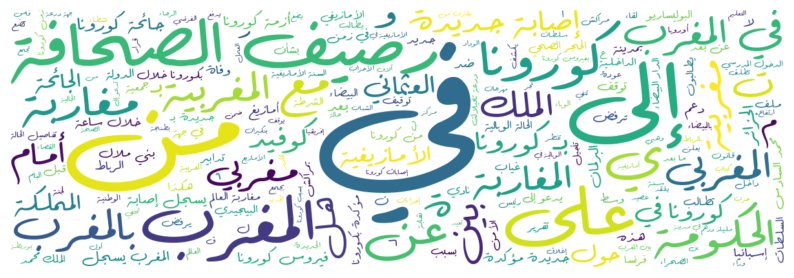

In [32]:

from wordcloud import WordCloud
titles = df['title'].dropna().str.cat(sep=' ')
# Step 4: Generate the word cloud


from bidi.algorithm import get_display   # pip install python-bidi

# reshaped_text = arabic_reshaper.reshape(titles)

# display_text =get_display(reshaped_text)

wordcloud = WordCloud(width=1200, height=400, background_color='white',font_path=arabic_font_path).generate(titles)

# Step 5: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Removing stop words and normalizing for displaying important words only 

In [79]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re


# small preprocessing for analysis
def normalize_arabic_text(text):
    # Download the necessary resources for Arabic text processing
    

    # Convert the text to lowercase
    text = text.lower()

    # Remove diacritics (Tashkeel)
    text = re.sub(r'[\u0617-\u061A\u064B-\u0652]', '', text)

    # Remove non-Arabic characters and digits
    text = re.sub(r'[^\u0621-\u064A\s]', '', text)
#     text = re.sub(r'أ','ا',text)
#     text = re.sub(r'إ','ا',text)
    text = re.sub(r'هى','هي',text)
    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove stopwords (common words that don't carry much meaning)
    stop_words = set(stopwords.words('arabic'))
    words = [word for word in words if word not in stop_words]

    # Join the normalized words back into a normalized text
    normalized_text = ' '.join(words)

    return normalized_text


normalized_text = normalize_arabic_text(titles)

Most words found in titles

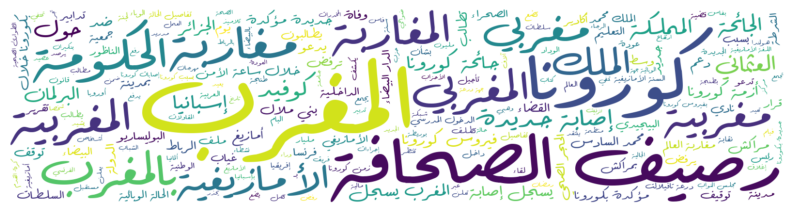

In [34]:
wordcloud = WordCloud(width=1600, height=400, background_color='white',font_path=arabic_font_path).generate(normalized_text)

# Step 5: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Story Column

In [36]:
story = df['story'].dropna().str.cat(sep=' ')

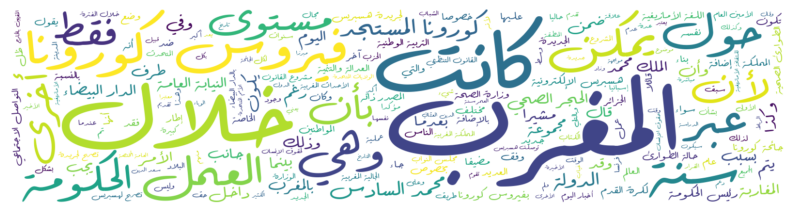

In [37]:
story = normalize_arabic_text(story)


wordcloud = WordCloud(width=1600, height=400, background_color='white',font_path=arabic_font_path).generate(story)

# Step 5: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Most important words founded:
* فيروس كورونا
* محمد السادس
* المغرب

In [15]:
#function for formatting text for plotting
def PlottingText(text):
    
    return get_display( arabic_reshaper.reshape(text))

# Common bi-grams in each class

Topic: art-et-culture


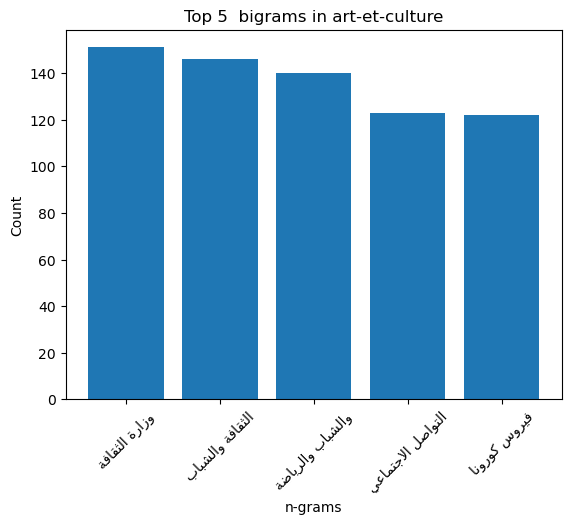

Topic: economie


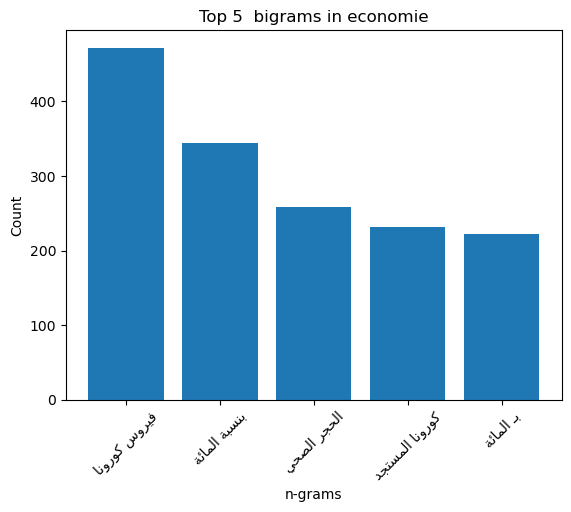

Topic: faits-divers


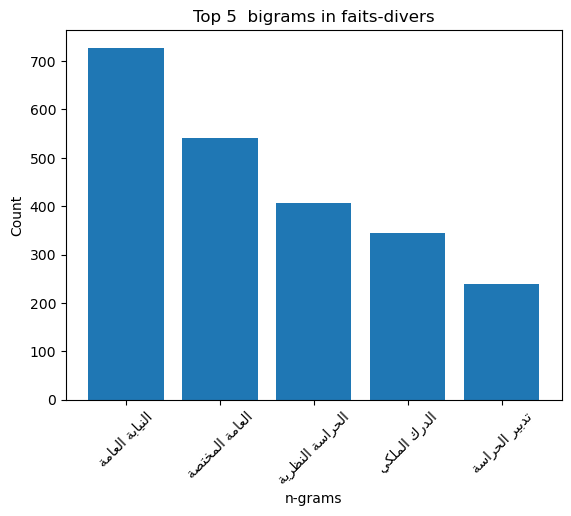

Topic: marocains-du-monde


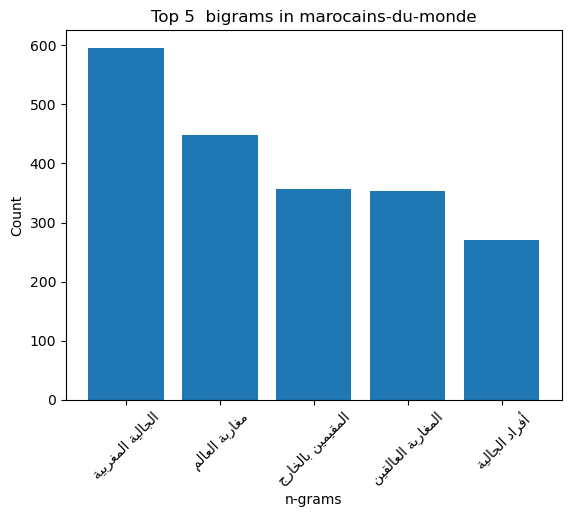

Topic: medias


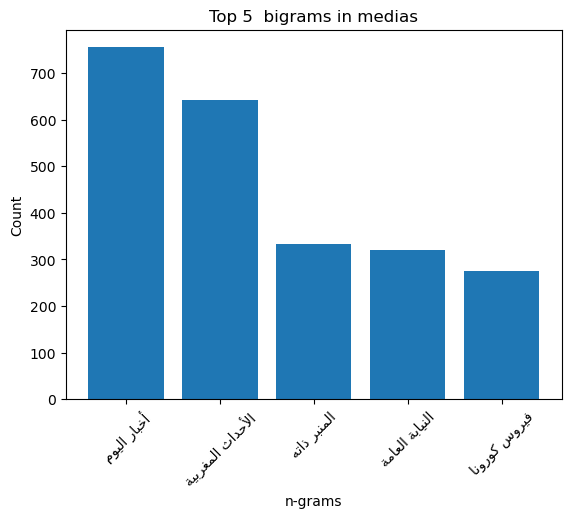

Topic: orbites


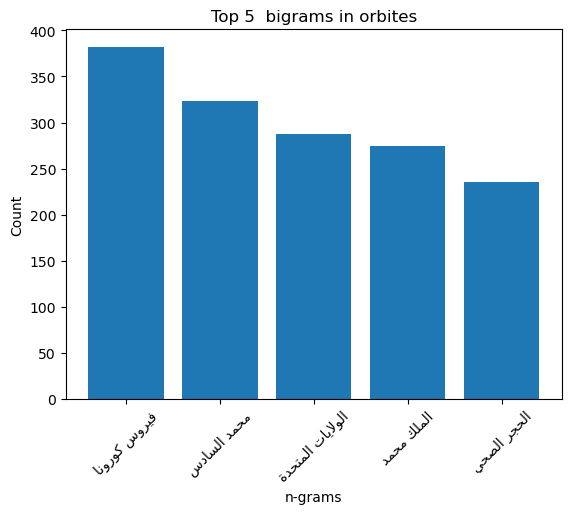

Topic: politique


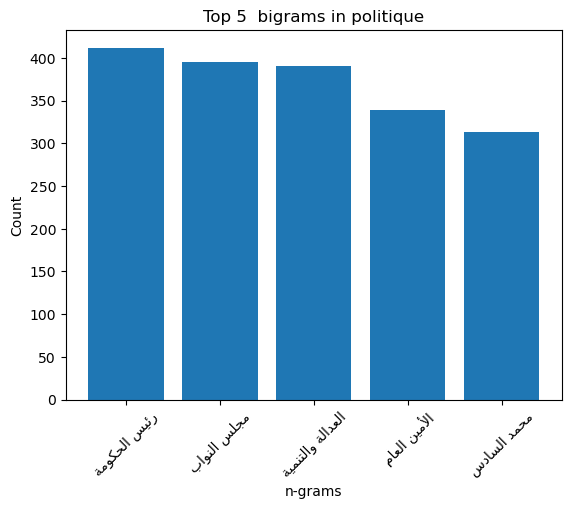

Topic: regions


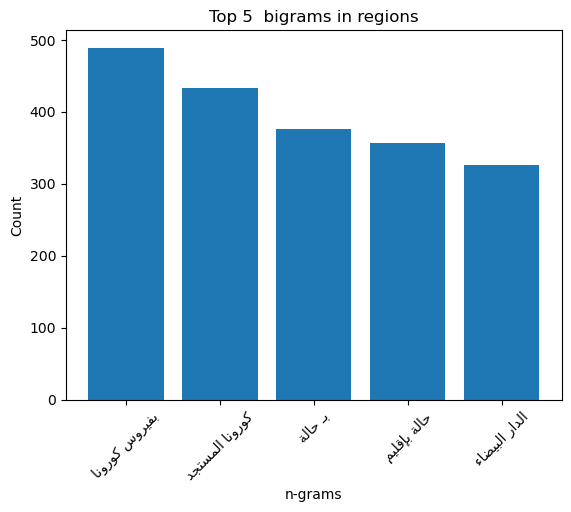

Topic: societe


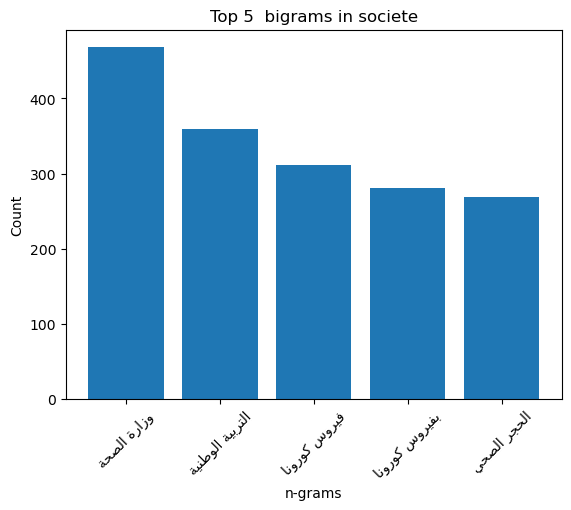

Topic: sport


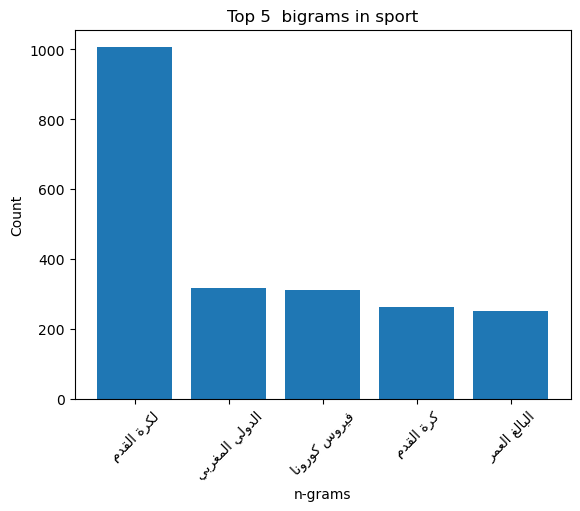

Topic: tamazight


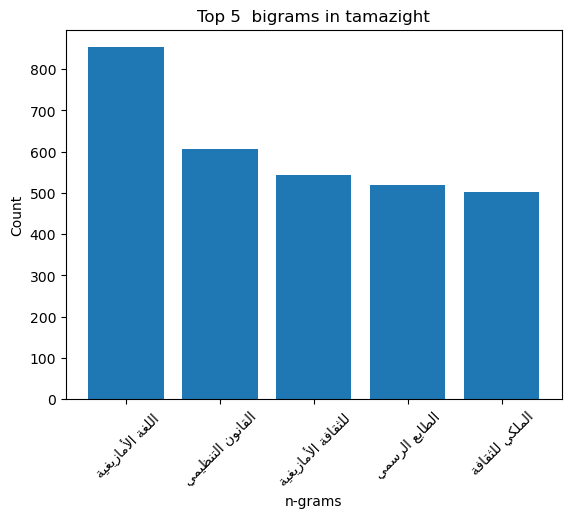

In [17]:
import pandas as pd
from collections import Counter
from nltk import ngrams
import re


# Function to preprocess the text
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and special characters
    return text

# Getting n-grams from a text
def get_ngrams(text, n):
    tokenized_text = preprocess_text(text).split()
    ngrams_list = list(ngrams(tokenized_text, n))
    return ngrams_list

#  Get top n frequent n-grams from a group , each group is a topic for example
def get_top_ngrams_group(group, n, top_n):
    all_ngrams = []
    for text in group:
        all_ngrams.extend(get_ngrams(text, n))
    
    ngrams_counts = Counter(all_ngrams)
    top_ngrams = ngrams_counts.most_common(top_n)
    return top_ngrams



#To make plotting of n-grams easily , 
'''
n_value : number of  n-grams
top_n_value: number of n-grams for each class
label : title to write on the plot
'''
def plot_n_grams(df,n_value,top_n_value,label):
    top_ngrams = get_top_ngrams_group(df['story'], n_value, top_n_value)

    df1 = pd.DataFrame(top_ngrams, columns = ['n_grams' , 'count'])
    v = df1.groupby('n_grams').sum()['count'].sort_values(ascending=False)
    grams = list(v.keys())

    bigrams = [ ' '.join(x) for x in grams]


    bigrams  = [PlottingText(i) for i in bigrams]


    plt.bar(bigrams,v.values )
    plt.xticks(rotation = 45)
    plt.xlabel('n-grams',fontfamily='Arial')
    plt.ylabel('Count',fontfamily='Arial')
    plt.title(f'Top 5  bigrams in {label}')
    plt.show()

n_value = 2  
top_n_value = 5  

# Grouping  DataFrame by the 'topic' column
grouped_df = df.groupby('topic')

# Iterate through each group, find the top n-grams, and display the results
for topic, group in grouped_df:
    print(f"Topic: {topic}")
    plot_n_grams(group,n_value,top_n_value,topic)

# Common bi-grams across all topics

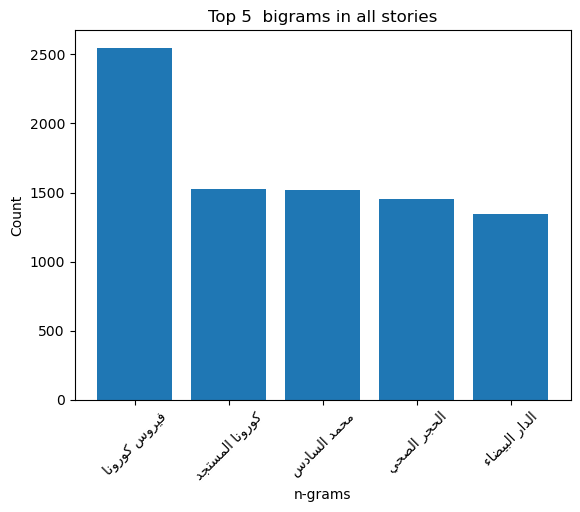

In [18]:
n_value = 2  # Specify the n for n-grams (e.g., 2 for bigrams, 3 for trigrams, etc.)
top_n_value = 5  # Specify the number of top frequent n-grams you want to display
plot_n_grams(df,n_value,top_n_value,'all stories')

# Conclusion 

## Most stories talks about corona virus which is reasonable as  it was mentioned in topics like health , sports  and socitey for it's impact

## Date column
### Data Ranges from 2013 to 2020 

In [22]:
 df['date']  = pd.to_datetime(df['date'])

In [23]:
min_datetime = df['date'].min()
max_datetime = df['date'].max()

In [24]:
print(min_datetime)
print(max_datetime)

2013-03-13 21:00:00
2020-10-03 10:00:00


## EDA based on date column 
* Grouping data by year to see trends 
* Grouping data by year and topic
* Grouping data by month among years 

**Grouping data by year to see trends** 

In [25]:
grouped_data = df.groupby(df['date'].dt.year)

 Trends in Year: 2013


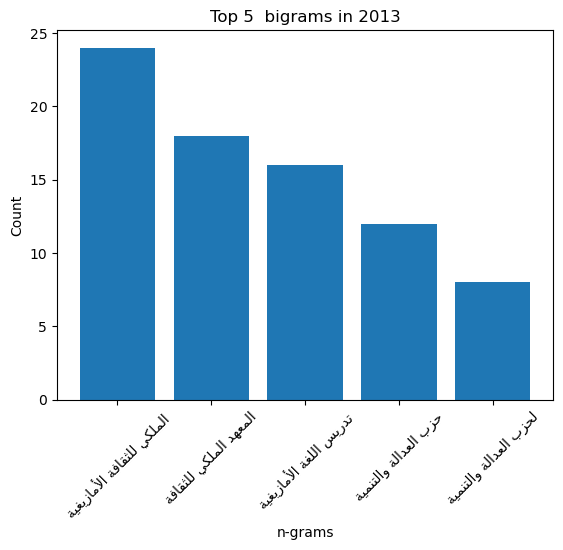

 Trends in Year: 2014


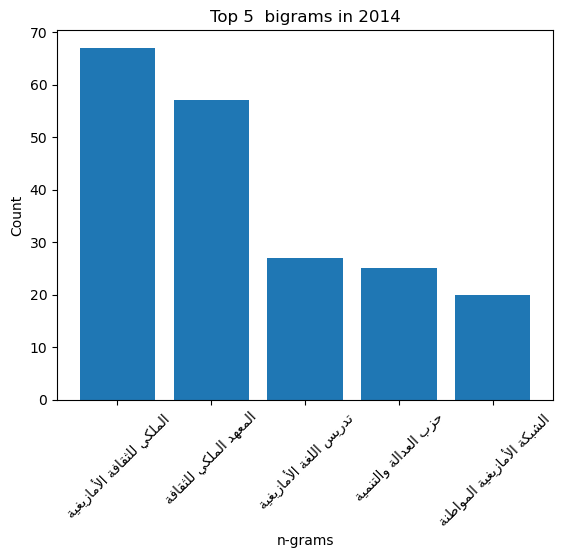

 Trends in Year: 2015


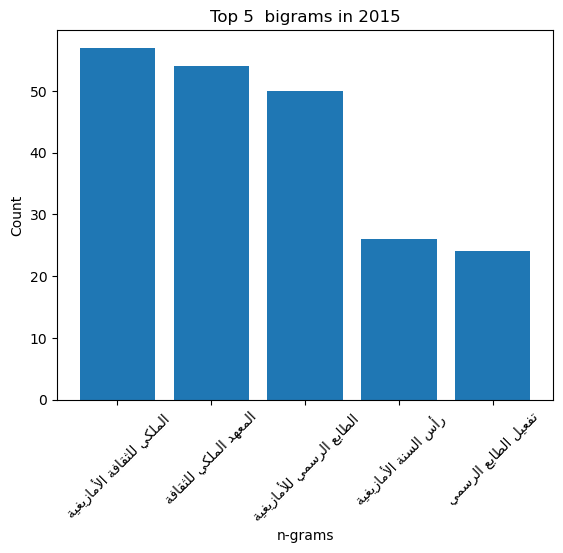

 Trends in Year: 2016


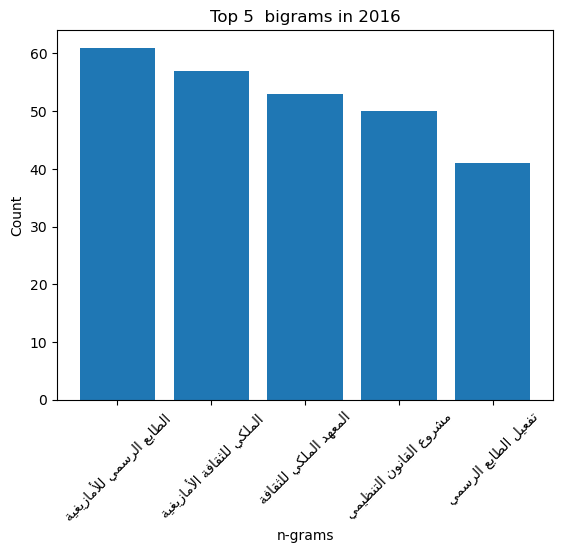

 Trends in Year: 2017


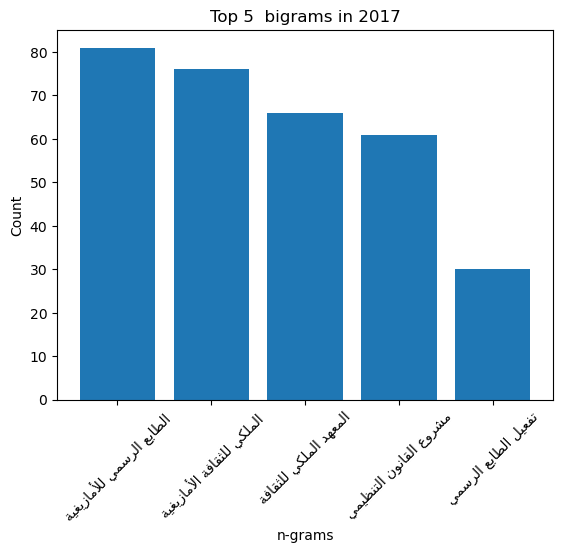

 Trends in Year: 2018


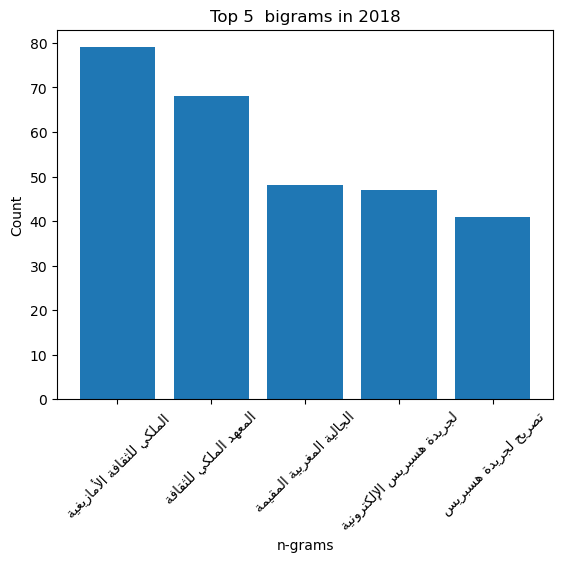

 Trends in Year: 2019


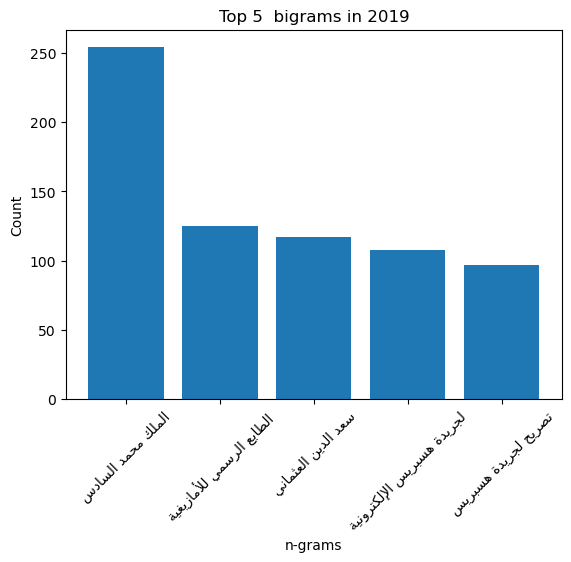

 Trends in Year: 2020


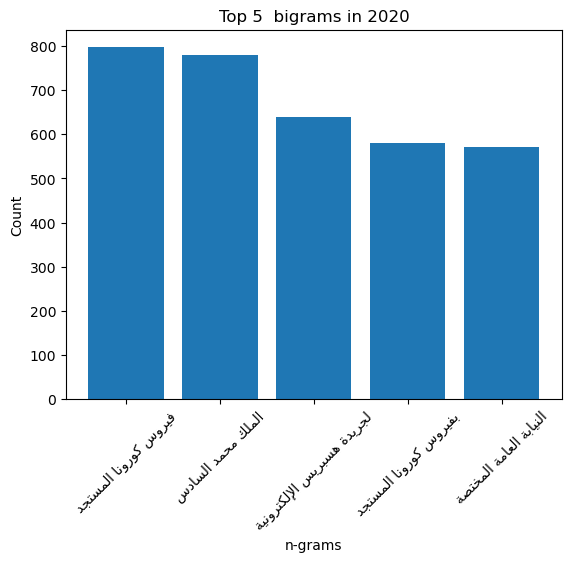

In [26]:
# Displaying the n-grams for every year (trends)
for year, group in grouped_data:
    print(f" Trends in Year: {year}")
    plot_n_grams(group,3,top_n_value,year)

### Conclusion 

* The tamiziagh language has much focus from this news paper and it's trend from 2013 to 2019 as it became as second official language in Morrocon starting from 2011 and the care from governement and media  to encourage people to learn it. 
* King Mohamed was doing  surgery in 2020 along with corona virus decisions for handling it  ,so it was a trend 

اللغة الأمازيغية هي إحدى اللغات الأصلية لشمال أفريقيا، وتُعتبر أحد اللغات القديمة التي ازدهرت في المنطقة قبل انتشار اللغة العربية. تُستخدم اللغة الأمازيغية بشكل رئيسي في مناطق الأطلس الكبير والأطلس الصغير والصحراء والأودية بالمغرب والجزائر وليبيا وتونس وموريتانيا ومالي والنيجر.

تهتم الصحف المغربية والإعلام المغربي بالكتابة عن اللغة الأمازيغية لعدة أسباب:

1. الاعتراف بالتنوع الثقافي: المغرب بلد متنوع ثقافيًا ولغويًا، واللغة الأمازيغية تمثل جزءًا مهمًا من هذا التراث الثقافي المتنوع. يعكس الكتابة عن اللغة الأمازيغية اهتمام المغاربة بتعزيز الوعي بالتراث اللغوي والثقافي المتنوع للبلاد.

2. الحفاظ على الهوية الثقافية: يعتبر الاهتمام باللغة الأمازيغية ودعمها من قِبَل الإعلام المغربي جزءًا من الجهود المبذولة للحفاظ على الهوية الثقافية للمغاربة، والحفاظ على التراث اللغوي والثقافي للشعب الأمازيغي.


**Grouping data by year and topic**

In [148]:
df.head(5)

,title,author,story,topic,date
0,شهادة طبيب جراح تورط قنصلا بتر أصبع مسنة,هسبريس من الدار البيضاء,قررت الغرفة الجنائية بمحكمة الاستئناف بمدينة ا...,faits-divers,2020-10-02 20:08:00
1,إحباط تهريب طن الحشيش بأكادير,رشيد بيجيكن من أكادير,تمكنت المصلحة الولائية للشرطة القضائية بمدينة ...,faits-divers,2020-10-02 19:37:00
2,كمين أمن الصويرة يسقط شبكة هجرة نظامية,ابراهيم مغراوي من مراكش,أوقفت عناصر فرقة الشرطة القضائية بالمنطقة الإق...,faits-divers,2020-10-02 18:35:00
3,تلميذة زاكورة تتهم زوج أختها باستغلالها جنسيا,هسبريس من زاكورة,كشف مصدر أمني مسؤول التلميذة المتحدرة جماعة تن...,faits-divers,2020-10-02 14:20:00
4,أحجار كريمة مزيفة تورط أشخاصا بمدينة أكادير,رشيد بيجيكن من أكادير,تمكنت عناصر المصلحة الولائية للشرطة القضائية ب...,faits-divers,2020-10-02 10:05:00


**Grouping data by month**  as certian festivals or cermonies can happen in specific months

In [41]:
months

['يناير',
 'فبراير',
 'مارس',
 'إبريل',
 'مايو',
 'يونيو',
 'يوليو',
 'أغسطس',
 'سبتمبر',
 'أكتوبر',
 'نوفمبر',
 'ديسمبر']

month 1:


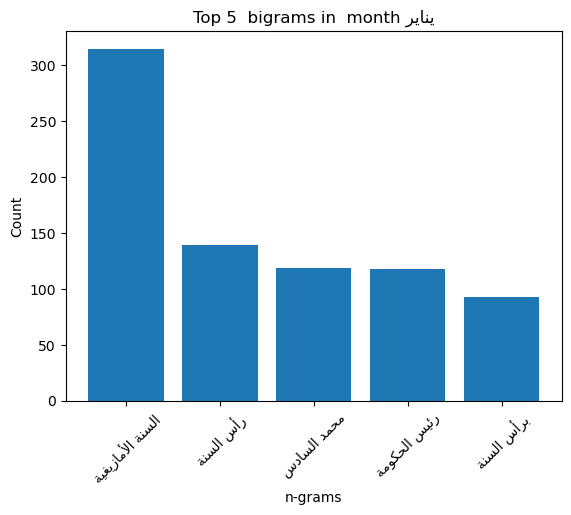

month 2:


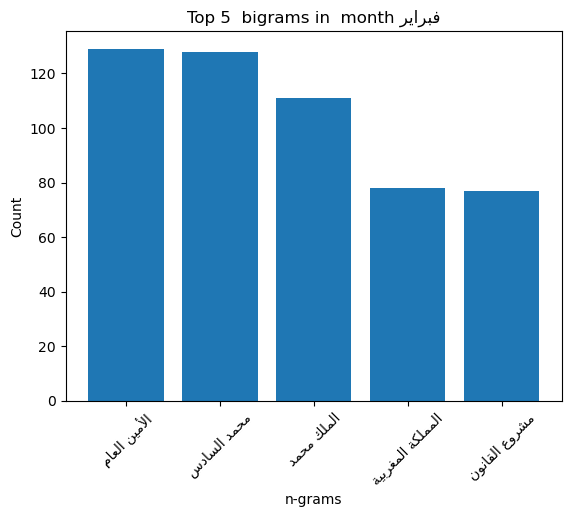

month 3:


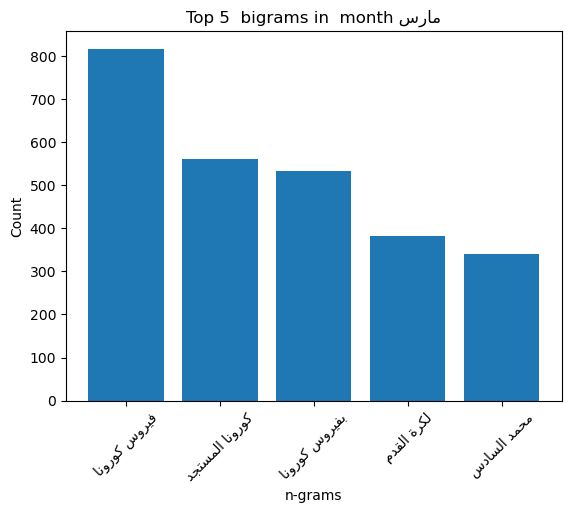

month 4:


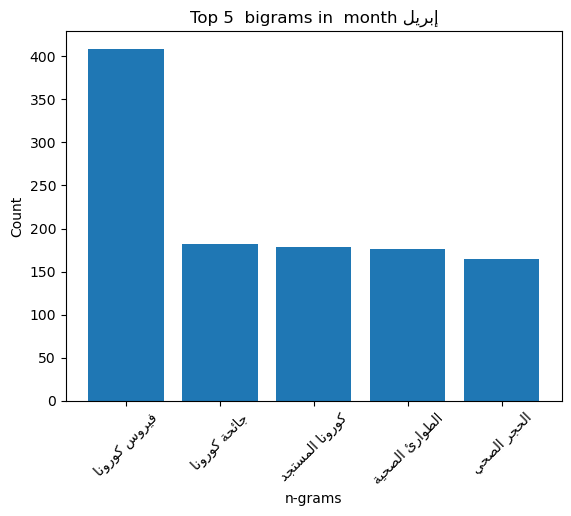

month 5:


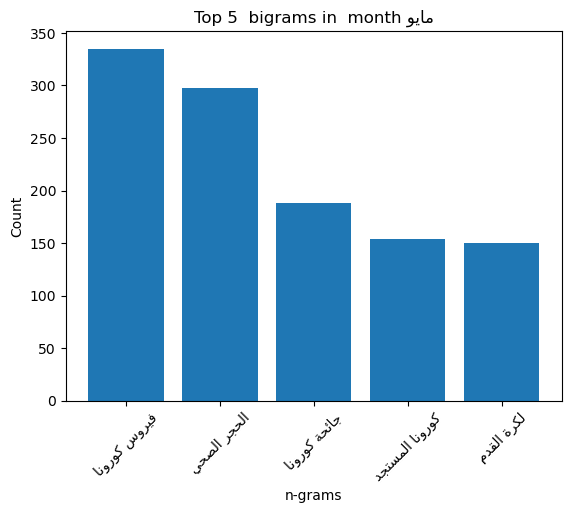

month 6:


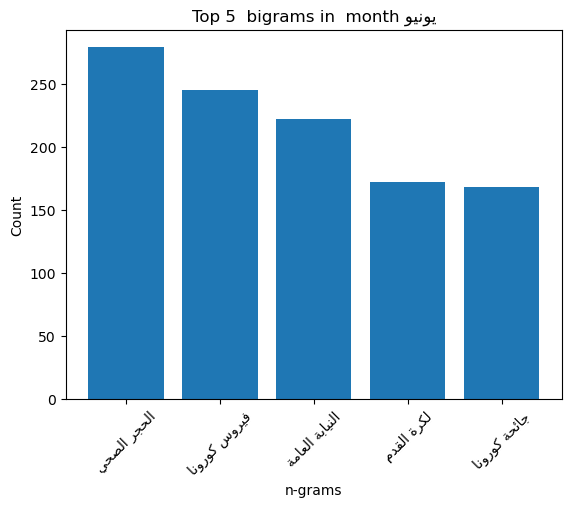

month 7:


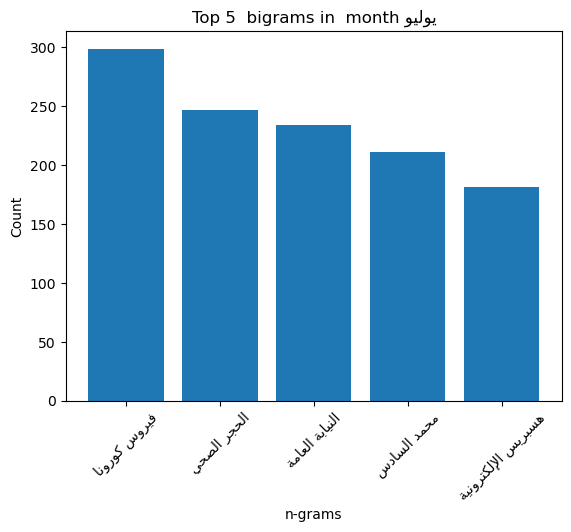

month 9:


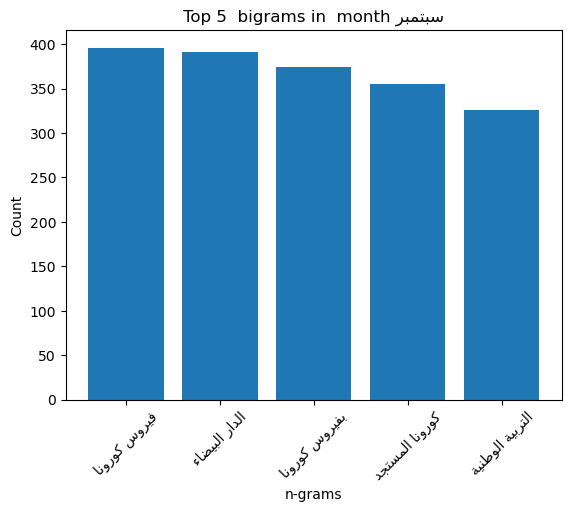

month 10:


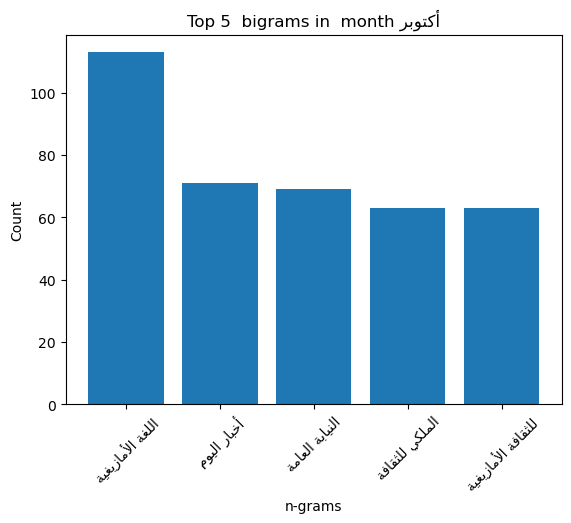

month 11:


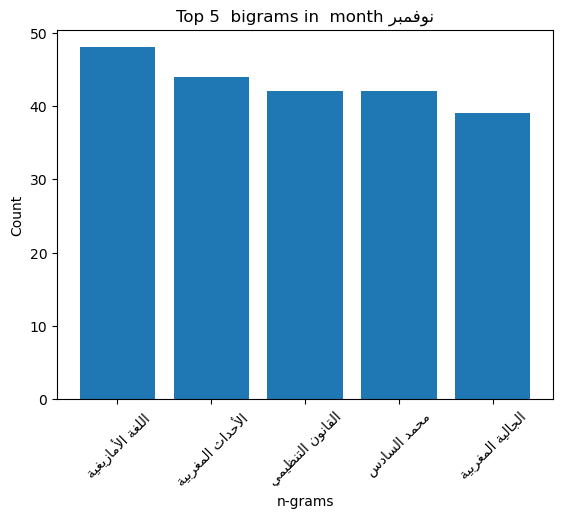

month 12:


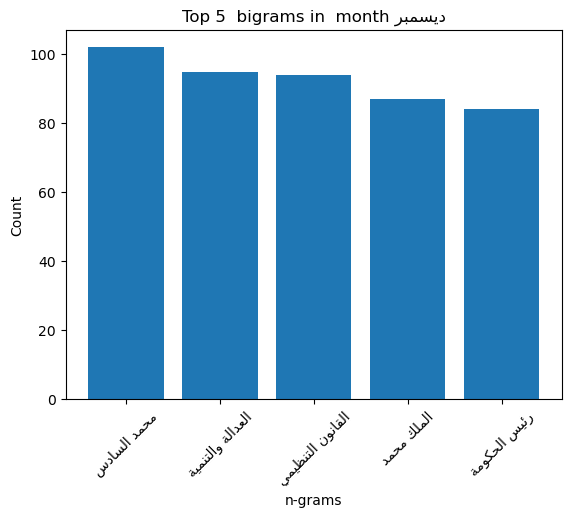

In [161]:
grouped_data = df.groupby(df['date'].dt.month)

# Perform any analysis you want on the grouped data
for month, group in grouped_data:
    print(f"month {month}:")
    plot_n_grams(group,2,top_n_value,f' { plottingText(months[month-1])}')

We can see which topics were trend in each year 

## Topics column

In [29]:
topics = df['topic'].value_counts()
print(topics)

faits-divers          1000
art-et-culture        1000
regions               1000
sport                 1000
medias                1000
economie              1000
tamazight             1000
societe               1000
orbites               1000
politique             1000
marocains-du-monde    1000
Name: topic, dtype: int64


Data is balanced with 11 different categories  each of which has 1000 story

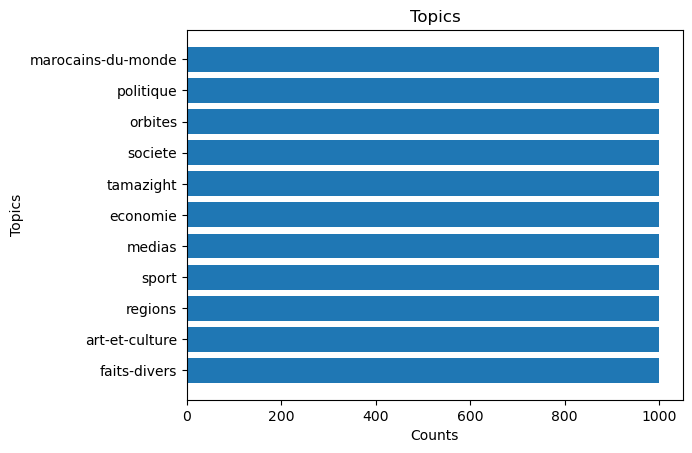

In [30]:
plt.barh(topics.index, topics.values)
plt.xlabel('Counts',fontfamily='Arial')
plt.ylabel('Topics',fontfamily='Arial')
plt.title(f'Topics')
plt.show()

## lengths of examples in words and letters

In [42]:
df['words_length'] = df['story'].apply(lambda x : len(x.split()))

In [43]:
df['letters_length'] = df['story'].apply(lambda x : len(x.strip()))

<Axes: >

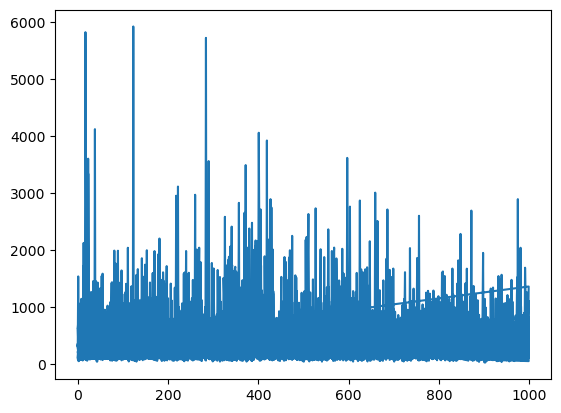

In [44]:
df['words_length'].plot()

<Axes: >

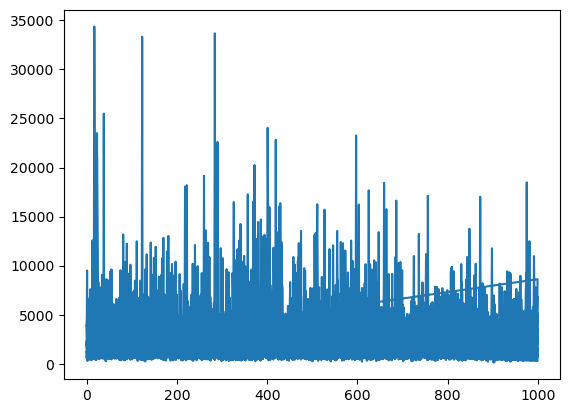

In [45]:
df['letters_length'].plot()

## plotting distrubition of data

### Plotting words_length

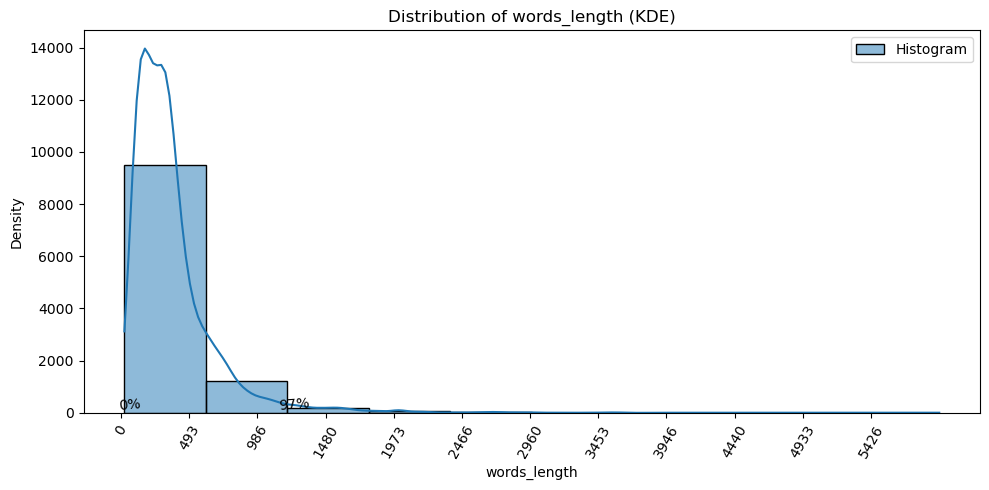

In [67]:
def plot_column_distribution_curve(dataframe, column_name,scale):
    # Create a kernel density estimate (KDE) plot of the column's values
    
    #scale variable is used to adjust the x-label to some plots
    fig, ax = plt.subplots(figsize=(10, 5))

    plt.xticks(rotation = 60)
    sns.histplot(dataframe[column_name], bins=10, ax=ax, kde=True, label='Histogram')

    # Add labels and title
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.title(f'Distribution of {column_name} (KDE)')

    
    # Customizing x-axis tick locations and labels to get better visulaization
    x_ticks = ax.get_xticks()
    
    custom_tick_positions = np.arange(0,dataframe[column_name].max() - dataframe[column_name].min(),(dataframe[column_name].max() / dataframe[column_name].min()) * scale).astype(int)[0:16]
    plt.xticks(custom_tick_positions)
# Calculating the CDF based on the frequency of each unique value
    value_counts = dataframe[column_name].value_counts()
    cdf_values = np.cumsum(value_counts) / len(dataframe)

    # Annotate the plot with percentages
    cdf_percentages = cdf_values * 100
    for p in cdf_percentages[1::500 *scale]:
        x_loc = np.percentile(dataframe[column_name], p)
        plt.annotate(f"{int(p)}%", xy=(x_loc, 0), xytext=(x_loc, 100), ha='center',rotation = 5)
        
        
    plt.locator_params(axis='x', nbins=15)
    


    # Show legend
    plt.legend()
    plt.tight_layout()
    # Show the plot
    plt.show()

# Call the function with your DataFrame and column name
plot_column_distribution_curve(df, 'words_length',2)

#### The plot shows that most stories has around text that is less than 403 words

### Plotting letters_length

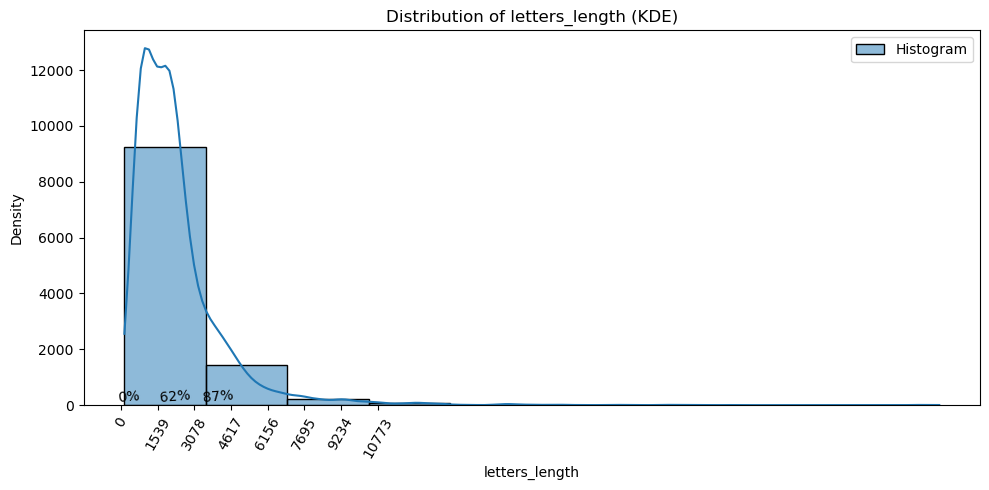

In [68]:
plot_column_distribution_curve(df, 'letters_length',3)

#### The plot shows that most stories uses letters that are  lower than  2788 words

## mean of daily publishing for every author

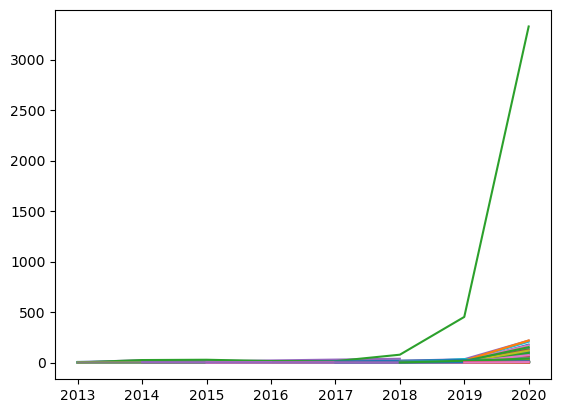

In [73]:
df['year'] = df['date'].dt.year

# Group the data by "author" and "year" and calculate the mean daily publishing count
author_year_grouped = df.groupby(['author', 'year']).size().reset_index(name='mean_daily_publishing')
m = 0
# Plot the mean daily publishing by author through the years
for author, author_data in author_year_grouped.groupby('author'):
    m += author_data['mean_daily_publishing'] 
    plt.plot(author_data['year'], author_data['mean_daily_publishing'], label=author)

In [80]:
concatenated_text = df['story'].str.cat(sep=' ')
concatenated_text = normalize_arabic_text(concatenated_text)


In [81]:
from collections import Counter

word_freq = {}
def display_word_frequency(text):
    # Tokenize the text into words (assuming words are separated by spaces)
    words = text.split()

    # Count the occurrences of each word using Counter
    word_count = Counter(words)
    global word_freq
    word_freq = word_count
    # Sort the words based on their frequencies in descending order
    sorted_word_frequency = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

    # Display the sorted word frequency
#     for word, frequency in sorted_word_frequency:
#         print(f"{word}: {frequency}")

# Example usage:

import collections

# Find the most frequent words
display_word_frequency(concatenated_text)

most_common_words = dict(word_freq.most_common(20))
# You can change the number '5' to the desired number of words you want to highlight.
    


### We can do thresholding based on the count to eliminate some stop words rather than the known letters

In [82]:
most_common_words

{'خلال': 10877,
 'المغرب': 10781,
 'المغربية': 9842,
 'أنه': 7298,
 'الأمازيغية': 7078,
 'كورونا': 6800,
 'المغربي': 6244,
 'حالة': 6058,
 'سنة': 5763,
 'الحكومة': 5525,
 'محمد': 5256,
 'اليوم': 5097,
 'الوطنية': 5085,
 'تم': 5003,
 'الوطني': 4849,
 'عدد': 4818,
 'حول': 4644,
 'كانت': 4578,
 'رئيس': 4557,
 'المغاربة': 4498}

Fixing Format of Arabic Names to display in plot 

In [88]:
authorsName = []

for i in top_categories.index:
    authorsName.append(  get_display( arabic_reshaper.reshape(i))) 

In [84]:
# authorsName

[]

In [44]:
# df['author'].value_counts().head(20)

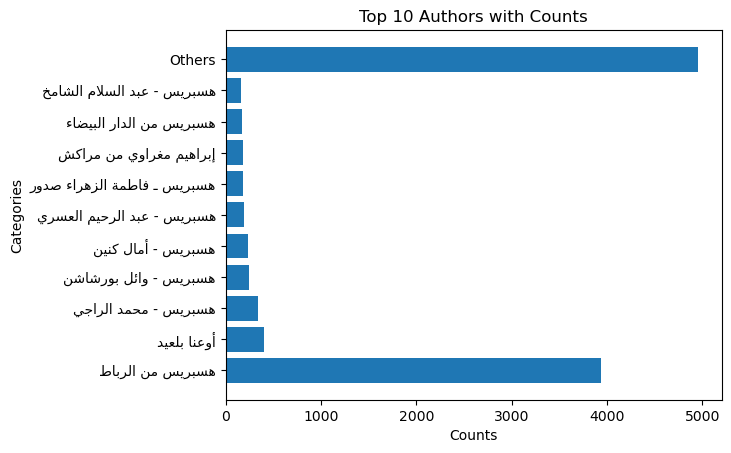

In [92]:
top_n = 10  # Number of top authors  to display

#Count  articles for every author 
category_counts = df['author'].value_counts()
top_categories = category_counts.head(top_n)
other_count = category_counts.sum() - top_categories.sum()
top_categories['Others'] = other_count



#get_display( arabic_reshaper.reshape('الفواصل'.decode('utf8')))

plt.barh(authorsName, top_categories.values)
plt.xlabel('Counts',fontfamily='Arial')
plt.ylabel('Categories',fontfamily='Arial')
plt.title(f'Top {top_n} Authors with Counts')
plt.show()


### Conclusion :
* هسبريس من الرباط  writes most of the articles 